<a href="https://colab.research.google.com/github/Yoko0202/Project-Porfolio/blob/main/DataScienceGroup5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('ufc-master.csv')

# Convert dates to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Restrict rows to values corresponding to 2023-2024
data = data[(data['Date'].dt.year >= 2023) & (data['Date'].dt.year <= 2024)]

# Remove all categorical data except for the 'Winner' column
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns_to_remove = [col for col in categorical_columns if col != 'Winner']
data = data.drop(columns=categorical_columns_to_remove)

# Replace all missing values with NaN
data = data.where(pd.notnull(data), None)

# Remove all columns with more than 20% missing values
missing_threshold = len(data) * 0.2
data = data.loc[:, data.isnull().sum() <= missing_threshold]

# Remove all columns with more than 80% zeros
zero_threshold = len(data) * 0.8
data = data.loc[:, (data == 0).sum() <= zero_threshold]

# Replace all remaining missing values with the mean of the column
data = data.fillna(data.mean(numeric_only=True))

# Replace "red" and "blue" in the 'Winner' column with binary values (red is 1)
data['Winner'] = data['Winner'].replace({'Red': 1, 'Blue': 0})

data = data.drop(columns=['Date'])

# Saved dataset
cleaned_file_path = 'cleaned_ufc_dataset.csv'
data.to_csv(cleaned_file_path, index=False)

data.head()

<ipython-input-2-6077149596ab>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Winner'] = data['Winner'].replace({'Red': 1, 'Blue': 0})


,Winner,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,...,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,FinishRound,TotalFightTimeSecs
0,0,5,0,4,4.39,0.57,0.0,0.44,1.00,4,...,-2,-2,-5.08,-5.08,-6,0.96,-0.2,-1.68,1.0,290.0
1,0,3,0,0,3.24,0.57,1.3,6.39,0.38,0,...,-1,-11,7.62,2.54,-2,0.14,-0.2,4.38,3.0,704.0
2,1,3,0,1,2.10,0.37,1.0,1.97,0.66,1,...,0,0,-7.62,-2.54,-2,-1.64,1.0,1.19,3.0,900.0
3,0,3,0,2,2.89,0.48,1.0,2.68,0.39,2,...,1,7,7.62,2.54,-2,-0.53,0.8,0.88,3.0,900.0
4,1,3,1,0,5.35,0.57,0.0,0.92,0.12,2,...,2,0,-2.54,-12.70,3,-1.26,0.0,0.92,1.0,164.0


# EDA starts here


In [ ]:
df = pd.read_csv('cleaned_ufc_dataset.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Winner                       965 non-null    int64  
 1   NumberOfRounds               965 non-null    int64  
 2   BlueCurrentLoseStreak        965 non-null    int64  
 3   BlueCurrentWinStreak         965 non-null    int64  
 4   BlueAvgSigStrLanded          965 non-null    float64
 5   BlueAvgSigStrPct             965 non-null    float64
 6   BlueAvgSubAtt                965 non-null    float64
 7   BlueAvgTDLanded              965 non-null    float64
 8   BlueAvgTDPct                 965 non-null    float64
 9   BlueLongestWinStreak         965 non-null    int64  
 10  BlueLosses                   965 non-null    int64  
 11  BlueTotalRoundsFought        965 non-null    int64  
 12  BlueWinsByDecisionSplit      965 non-null    int64  
 13  BlueWinsByDecisionUn

In [ ]:
def classify_variables(df):
    continuous_vars = []
    discrete_vars = []

    for column in df.columns:
        # Get the data type of the column
        dtype = df[column].dtype

        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(dtype):
            # Count the number of unique values
            unique_vals = df[column].nunique()

            # Classify as continuous or discrete
            if unique_vals > 10:  # Arbitrary threshold to classify as continuous
                continuous_vars.append(column)
            else:
                discrete_vars.append(column)

    return continuous_vars, discrete_vars

continuous_vars, discrete_vars = classify_variables(df)

print("Continuous Variables:")
for var in continuous_vars:
    print(var)

print("\nDiscrete Variables:")
for var in discrete_vars:
    print(var)

Continuous Variables:
BlueCurrentWinStreak
BlueAvgSigStrLanded
BlueAvgSigStrPct
BlueAvgSubAtt
BlueAvgTDLanded
BlueAvgTDPct
BlueLongestWinStreak
BlueLosses
BlueTotalRoundsFought
BlueWinsByDecisionUnanimous
BlueWinsByKO
BlueWinsBySubmission
BlueWins
BlueHeightCms
BlueReachCms
BlueWeightLbs
RedCurrentWinStreak
RedAvgSigStrLanded
RedAvgSigStrPct
RedAvgSubAtt
RedAvgTDLanded
RedAvgTDPct
RedLongestWinStreak
RedLosses
RedTotalRoundsFought
RedWinsByDecisionUnanimous
RedWinsByKO
RedWinsBySubmission
RedWins
RedHeightCms
RedReachCms
RedWeightLbs
RedAge
BlueAge
WinStreakDif
LongestWinStreakDif
WinDif
LossDif
TotalRoundDif
TotalTitleBoutDif
KODif
SubDif
HeightDif
ReachDif
AgeDif
SigStrDif
AvgSubAttDif
AvgTDDif
TotalFightTimeSecs

Discrete Variables:
Winner
NumberOfRounds
BlueCurrentLoseStreak
BlueWinsByDecisionSplit
RedCurrentLoseStreak
RedWinsByDecisionSplit
LoseStreakDif
FinishRound


In [ ]:
continuous_vars = [
    'BlueCurrentWinStreak', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded',
    'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueWinsByDecisionUnanimous',
    'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWins', 'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs',
    'RedCurrentWinStreak', 'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded',
    'RedAvgTDPct', 'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedWinsByDecisionUnanimous',
    'RedWinsByKO', 'RedWinsBySubmission', 'RedWins', 'RedHeightCms', 'RedReachCms', 'RedWeightLbs',
    'RedAge', 'BlueAge', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif',
    'TotalTitleBoutDif', 'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif',
    'AvgTDDif', 'TotalFightTimeSecs'
]


# BEST PREDICTORS

In [ ]:
from scipy import stats

for feature in continuous_vars:
    f_stat, p_val = stats.f_oneway(df[df['Winner'] == 0][feature], df[df['Winner'] == 1][feature])
    print(f"{feature}: p-value = {p_val}")

BlueCurrentWinStreak: p-value = 0.0008043465639649489
BlueAvgSigStrLanded: p-value = 2.18867576709303e-05
BlueAvgSigStrPct: p-value = 8.744559608764394e-13
BlueAvgSubAtt: p-value = 0.004147779926592503
BlueAvgTDLanded: p-value = 1.0889265879967291e-05
BlueAvgTDPct: p-value = 0.0014055878249946672
BlueLongestWinStreak: p-value = 0.35869067936537025
BlueLosses: p-value = 0.00016420012883819668
BlueTotalRoundsFought: p-value = 0.030159242611414696
BlueWinsByDecisionUnanimous: p-value = 0.4283826053004799
BlueWinsByKO: p-value = 0.2077404805729718
BlueWinsBySubmission: p-value = 0.6351438646854111
BlueWins: p-value = 0.1881327673405384
BlueHeightCms: p-value = 0.3965889225237331
BlueReachCms: p-value = 0.2661061391515354
BlueWeightLbs: p-value = 0.13407608241941443
RedCurrentWinStreak: p-value = 2.6559120646982e-05
RedAvgSigStrLanded: p-value = 0.001471500994331972
RedAvgSigStrPct: p-value = 9.444069533774941e-12
RedAvgSubAtt: p-value = 0.007828107931390715
RedAvgTDLanded: p-value = 0.0017

In [ ]:
statistically_significant_features = [
    'BlueCurrentWinStreak',
    'BlueAvgSigStrLanded',
    'BlueAvgSigStrPct',
    'BlueAvgSubAtt',
    'BlueAvgTDLanded',
    'BlueAvgTDPct',
    'BlueLosses',
    'BlueTotalRoundsFought',
    'RedCurrentWinStreak',
    'RedAvgSigStrLanded',
    'RedAvgSigStrPct',
    'RedAvgSubAtt',
    'RedAvgTDLanded',
    'RedAvgTDPct',
    'RedLosses',
    'RedTotalRoundsFought',
    'RedWins',
    'RedHeightCms',
    'RedAge',
    'BlueAge',
    'WinStreakDif',
    'WinDif',
    'LossDif',
    'TotalRoundDif',
    'KODif',
    'HeightDif',
    'AgeDif',
    'SigStrDif',
    'AvgSubAttDif',
    'AvgTDDif']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define X (features) and y (target)
X = df[statistically_significant_features]
y = df['Winner']

# Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                  Feature  Importance
2        BlueAvgSigStrPct    0.054742
27              SigStrDif    0.052500
29               AvgTDDif    0.052485
10        RedAvgSigStrPct    0.048175
26                 AgeDif    0.048070
1     BlueAvgSigStrLanded    0.046754
9      RedAvgSigStrLanded    0.045904
4         BlueAvgTDLanded    0.038995
13            RedAvgTDPct    0.038337
5            BlueAvgTDPct    0.036267
23          TotalRoundDif    0.036157
28           AvgSubAttDif    0.035876
15   RedTotalRoundsFought    0.035414
12         RedAvgTDLanded    0.035385
19                BlueAge    0.030801
7   BlueTotalRoundsFought    0.030362
18                 RedAge    0.029847
20           WinStreakDif    0.028808
22                LossDif    0.028702
25              HeightDif    0.027984
11           RedAvgSubAtt    0.026834
17           RedHeightCms    0.026676
3           BlueAvgSubAtt    0.025814
24                  KODif    0.023576
16                RedWins    0.022916
21          

In [ ]:
# Selecting the top 10 most important features
top_n_features = feature_importances.head(10)['Feature']

X_top_n = df[top_n_features]
print(top_n_features)


2        BlueAvgSigStrPct
27              SigStrDif
29               AvgTDDif
10        RedAvgSigStrPct
26                 AgeDif
1     BlueAvgSigStrLanded
9      RedAvgSigStrLanded
4         BlueAvgTDLanded
13            RedAvgTDPct
5            BlueAvgTDPct
Name: Feature, dtype: object


In [ ]:
selected_features_2 = [
    'BlueAvgSigStrPct',
    'SigStrDif',
    'AvgTDDif',
    'RedAvgSigStrPct',
    'AgeDif',
    'BlueAvgSigStrLanded',
    'RedAvgSigStrLanded',
    'BlueAvgTDLanded',
    'RedAvgTDPct',
    'BlueAvgTDPct'
]

# New dataframe with only the selected features
df_selected = df[selected_features_2]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Constant to the dataframe for VIF calculation (for the intercept term)
X = add_constant(df_selected)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                Feature         VIF
0                 const  105.710732
1      BlueAvgSigStrPct    1.181994
2             SigStrDif         inf
3              AvgTDDif    2.846217
4       RedAvgSigStrPct    1.123162
5                AgeDif    1.039408
6   BlueAvgSigStrLanded         inf
7    RedAvgSigStrLanded         inf
8       BlueAvgTDLanded    2.827934
9           RedAvgTDPct    1.284975
10         BlueAvgTDPct    1.213302


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


# Final Predictors

In [ ]:
filtered_features = [
    'BlueAvgSigStrPct', 'AvgTDDif', 'RedAvgSigStrPct', 'AgeDif',
    'BlueAvgTDLanded', 'RedAvgTDPct', 'BlueAvgTDPct'
]
df_final_filtered = df[filtered_features + ['Winner']]
df_final_filtered.head(3)


,BlueAvgSigStrPct,AvgTDDif,RedAvgSigStrPct,AgeDif,BlueAvgTDLanded,RedAvgTDPct,BlueAvgTDPct,Winner
0,0.57,-1.68,0.46,-6,0.44,0.38,1.00,0
1,0.57,4.38,0.45,-2,6.39,0.35,0.38,0
2,0.37,1.19,0.50,-2,1.97,1.00,0.66,1


In [ ]:
for feature in filtered_features:
  print(feature)

BlueAvgSigStrPct
AvgTDDif
RedAvgSigStrPct
AgeDif
BlueAvgTDLanded
RedAvgTDPct
BlueAvgTDPct


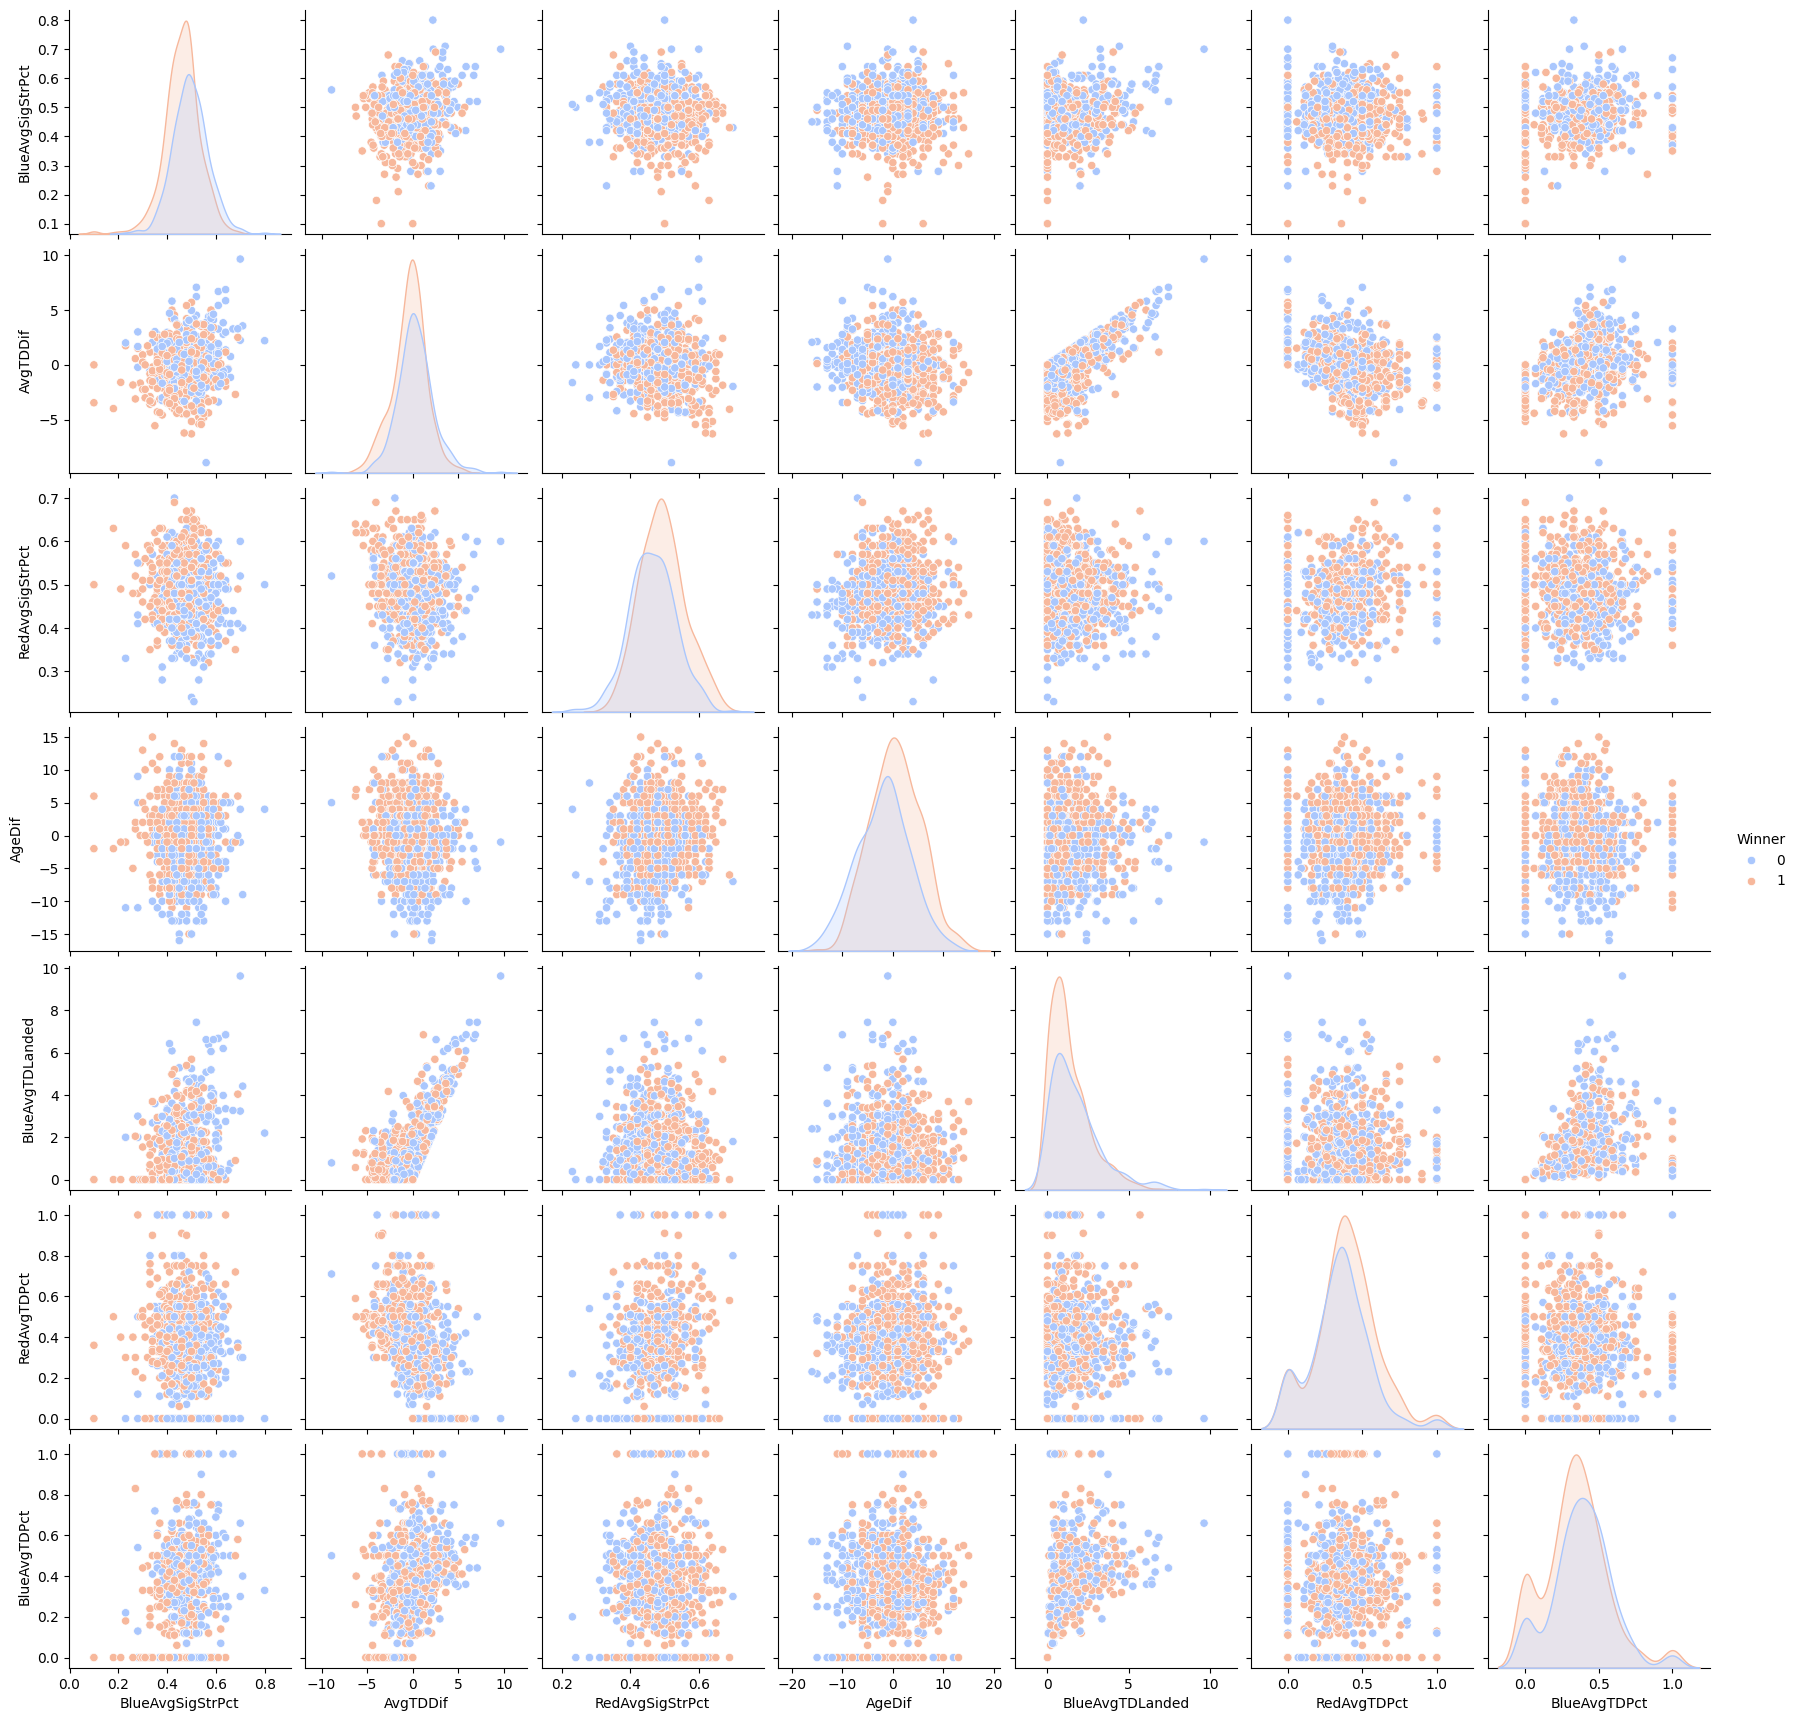

In [ ]:
sns.pairplot(df_final_filtered, hue='Winner', palette='coolwarm')
plt.show()

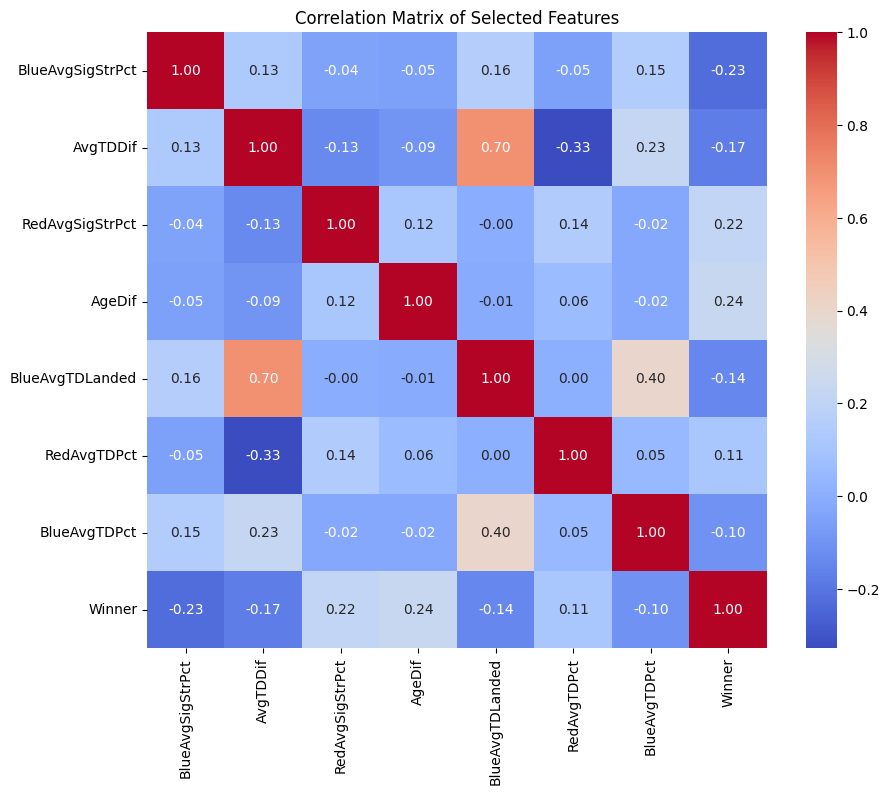

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_final_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Selected Features')
plt.show()

<ipython-input-16-9ad9f9bb5bd7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Winner', y=feature, data=df_final_filtered, palette='coolwarm', ax=axes[i])
<ipython-input-16-9ad9f9bb5bd7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Winner', y=feature, data=df_final_filtered, palette='coolwarm', ax=axes[i])
<ipython-input-16-9ad9f9bb5bd7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Winner', y=feature, data=df_final_filtered, palette='coolwarm', ax=axes[i])
<ipython-input-16-9ad9f9bb5bd7>:12: FutureWarning: 

Passing `pa

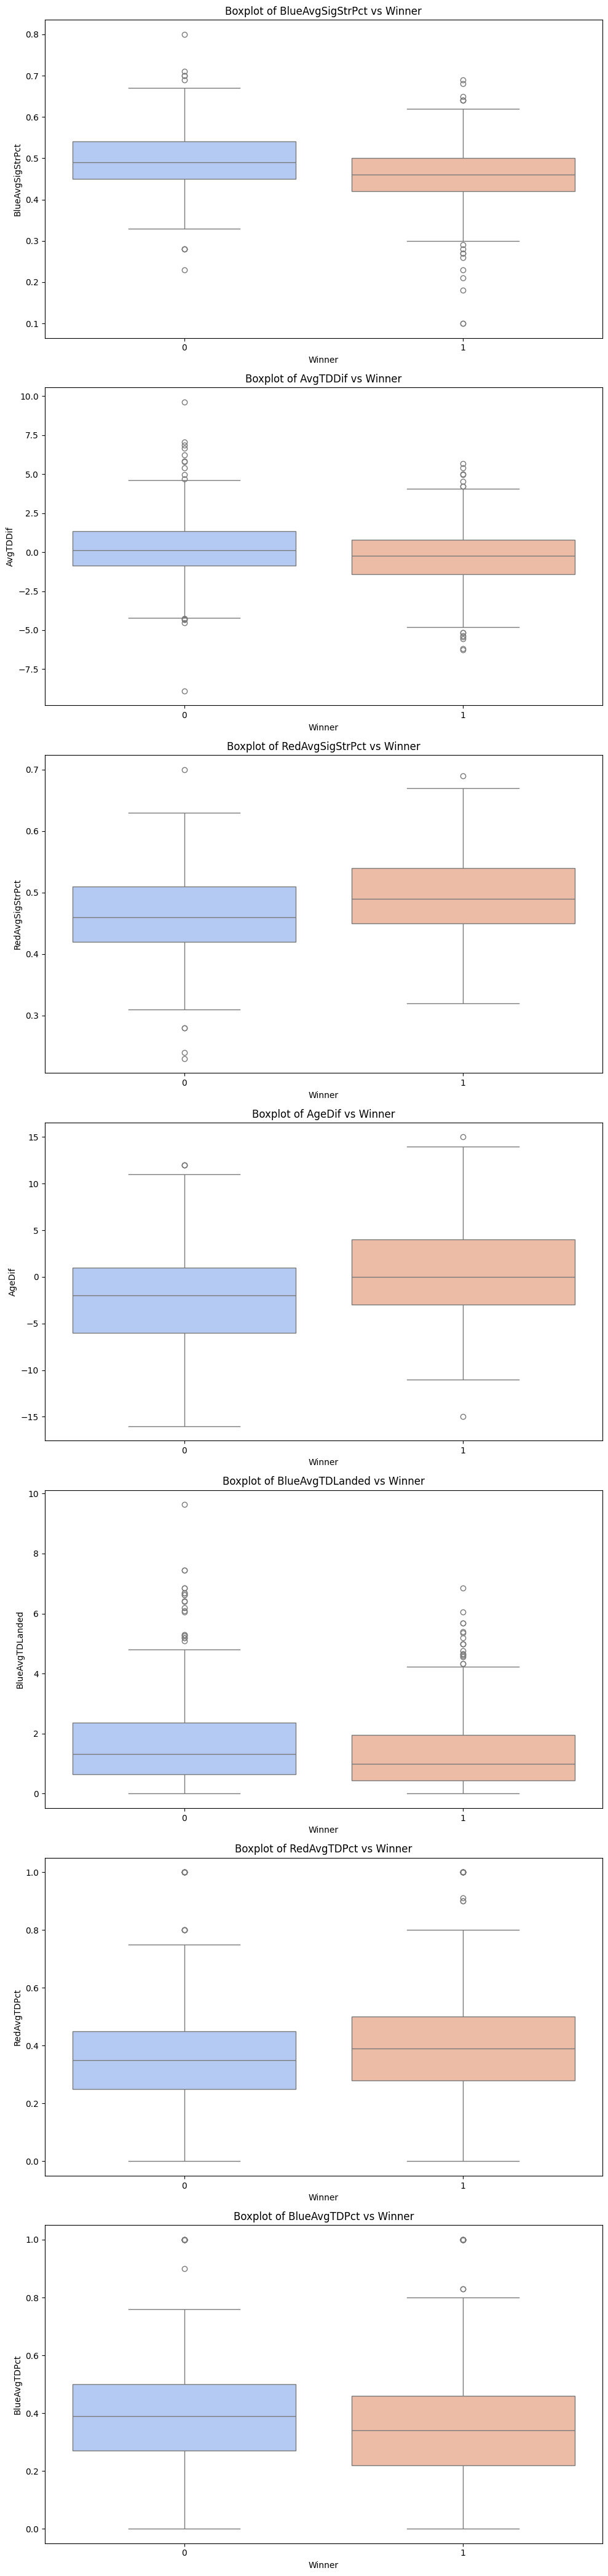

In [ ]:
# Number of features to plot
n_features = len(filtered_features)

# Create a figure with subplots
fig, axes = plt.subplots(n_features, 1, figsize=(10, 6 * n_features))

if n_features == 1:
    axes = [axes]

# Loop through each feature and plot on the corresponding subplot
for i, feature in enumerate(filtered_features):
    sns.boxplot(x='Winner', y=feature, data=df_final_filtered, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} vs Winner')

plt.tight_layout()
plt.show()

<ipython-input-17-6f88422137ff>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='Winner', data=df_final_filtered, palette='coolwarm', ax=axes[i])
<ipython-input-17-6f88422137ff>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='Winner', data=df_final_filtered, palette='coolwarm', ax=axes[i])
<ipython-input-17-6f88422137ff>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='Winner', data=df_final_filtered, palette='coolwarm', ax=axes[i])
<ipython-input-17-6f88422137ff>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='Winner', data=df_final_filtered, palette='coolwarm', ax=axes[i])
<ipython-input-17-6f88422137ff>:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=feature, y='Winner', data=d

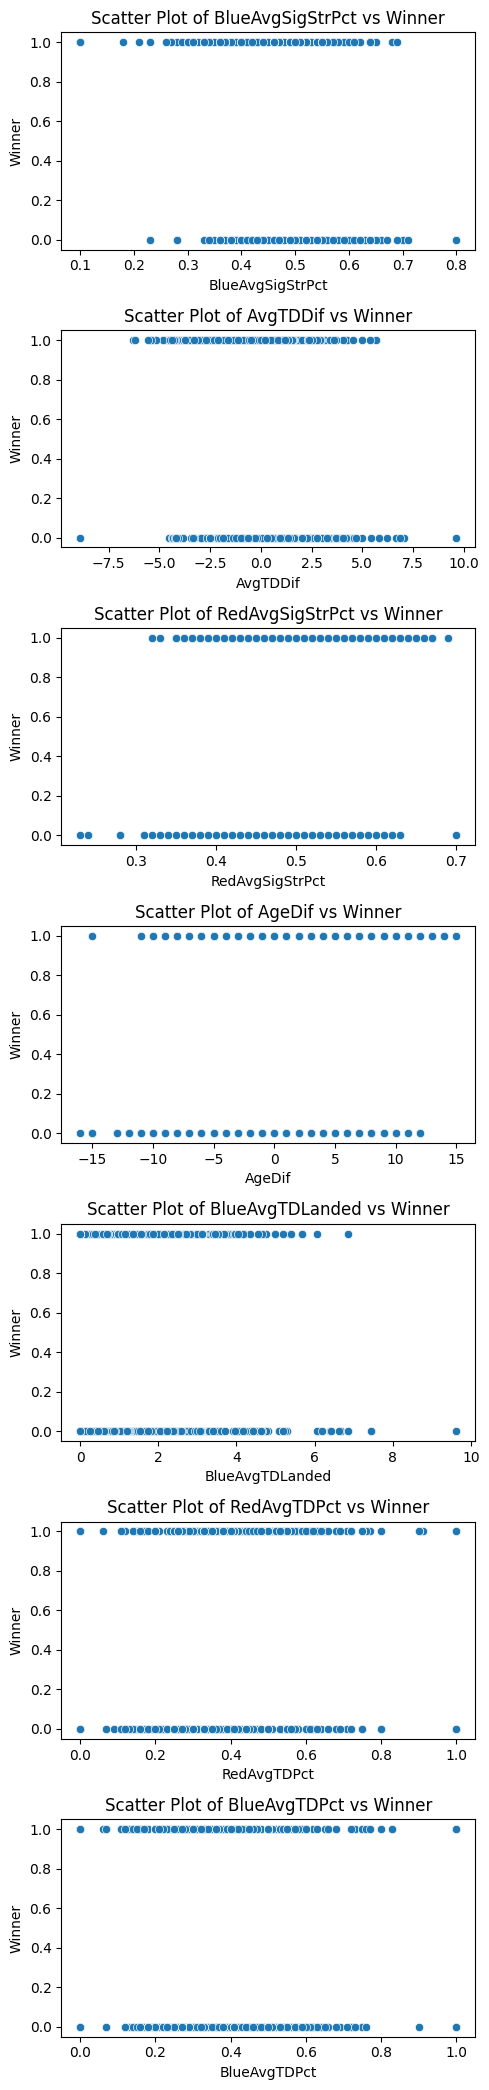

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

n_features = len(filtered_features)

# create a figure with subplots
fig, axes = plt.subplots(n_features, 1, figsize=(5, 3 * n_features))
# ensure axes is iterable even if there's only one feature
if n_features == 1:
    axes = [axes]
# loop through each feature and plot on the corresponding subplot
for i, feature in enumerate(filtered_features):
    sns.scatterplot(x=feature, y='Winner', data=df_final_filtered, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature} vs Winner')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Winner')
# adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

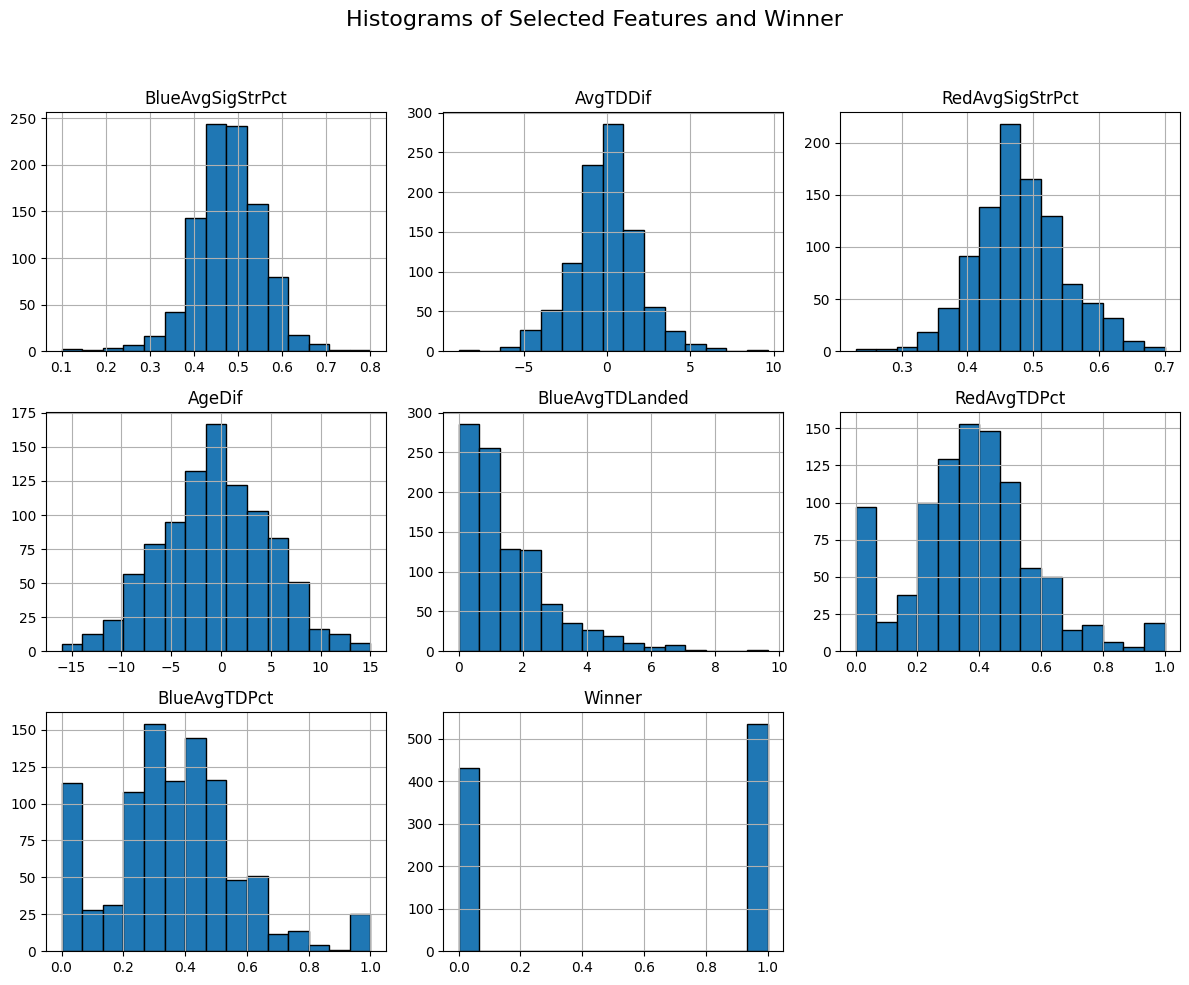

In [ ]:
df_final_filtered.hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.suptitle('Histograms of Selected Features and Winner', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# THE REAL LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


X = df_final_filtered[filtered_features]
y = df_final_filtered['Winner']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', C=10)
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test_scaled)
y_prob = log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66        94
           1       0.68      0.64      0.66        99

    accuracy                           0.66       193
   macro avg       0.66      0.66      0.66       193
weighted avg       0.66      0.66      0.66       193

ROC AUC Score: 0.713518160326671
Confusion Matrix:
[[64 30]
 [36 63]]


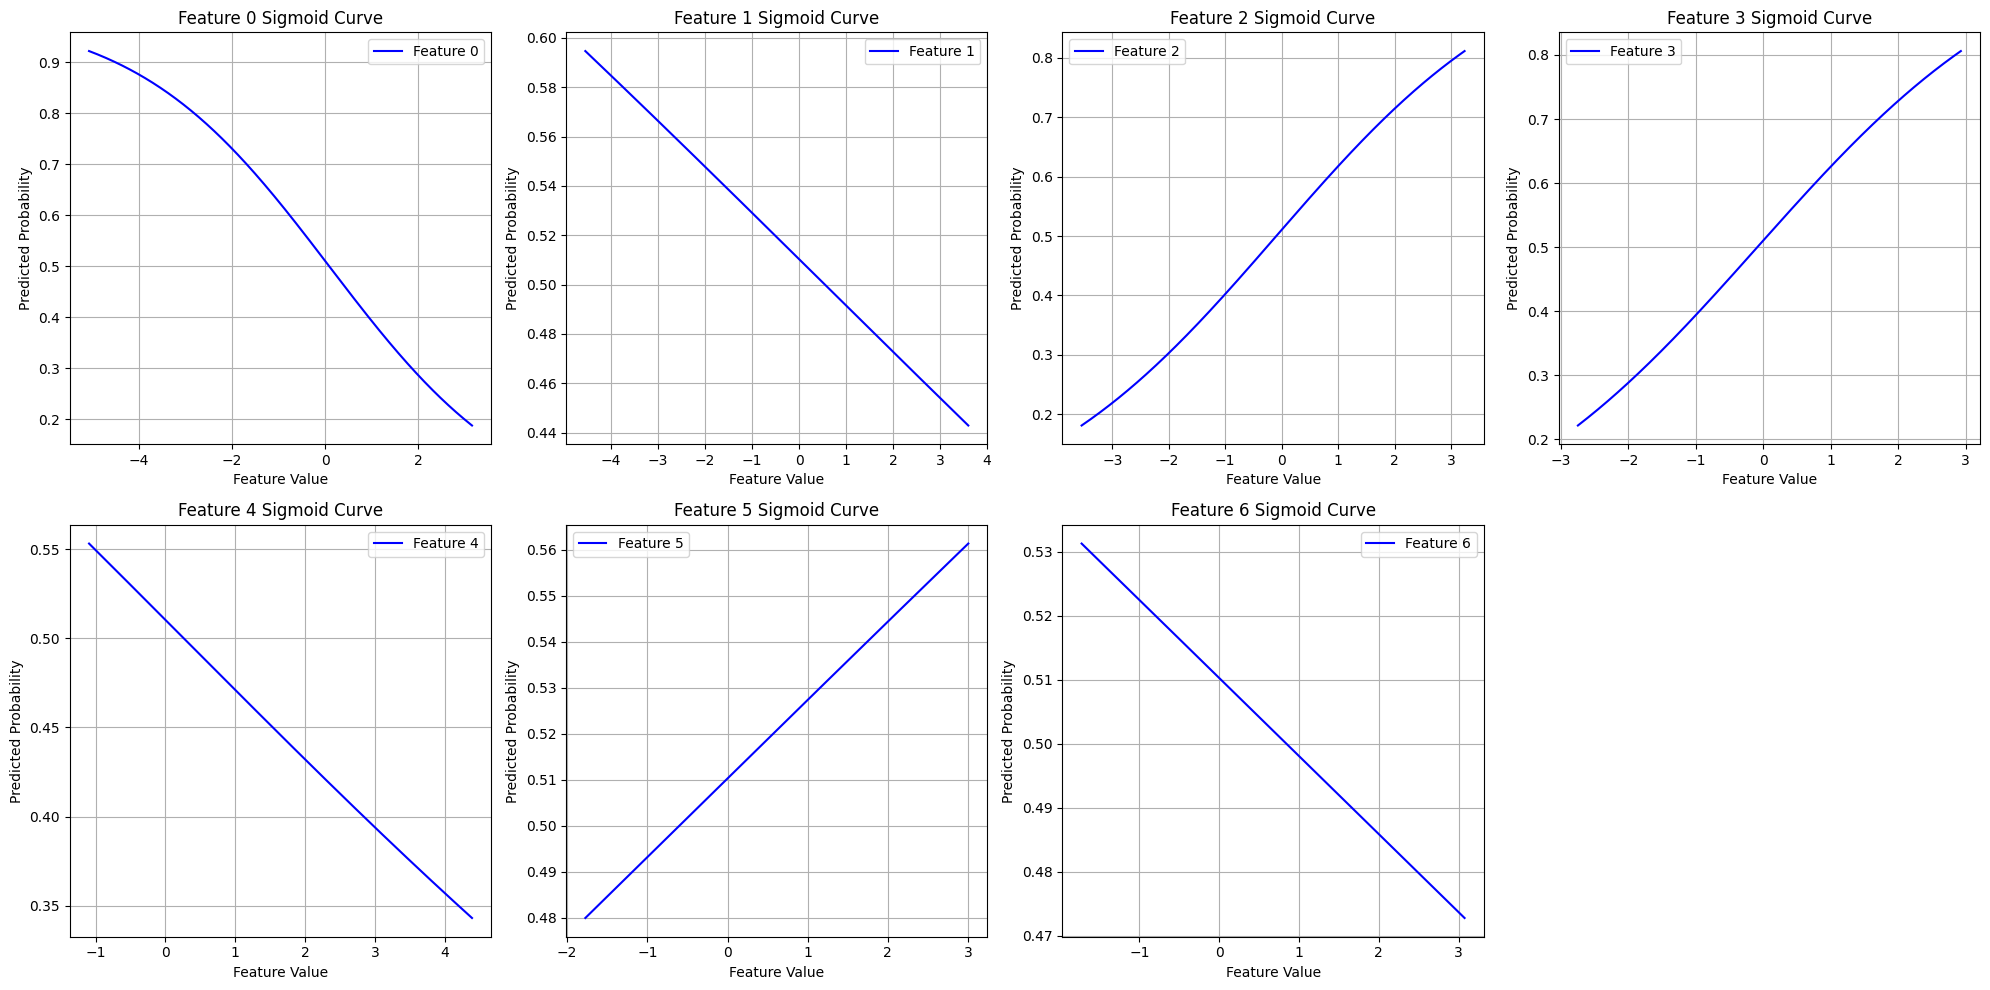

In [ ]:
# Number of features to plot
num_features = 7

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for feature_index in range(num_features):
    X_single_feature = X_train_scaled[:, feature_index]

    # Generate a range of values for the chosen feature
    feature_range = np.linspace(X_single_feature.min(), X_single_feature.max(), 500).reshape(-1, 1)

    # Predictions on this range
    X_feature_range = np.zeros((feature_range.shape[0], X_train_scaled.shape[1]))
    X_feature_range[:, feature_index] = feature_range.flatten()

    # Predicted probabilities
    y_prob_feature = log_reg_model.predict_proba(X_feature_range)[:, 1]

    # Plot sigmoid curve
    ax = axes[feature_index]
    ax.plot(feature_range, y_prob_feature, label=f'Feature {feature_index}', color='blue')
    ax.set_title(f'Feature {feature_index} Sigmoid Curve', fontsize=12)
    ax.set_xlabel('Feature Value', fontsize=10)
    ax.set_ylabel('Predicted Probability', fontsize=10)
    ax.grid(True)
    ax.legend()

if len(axes) > num_features:
    axes[-1].axis('off')

# Adjust layout and show
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm

# Add the intercept (constant term) to the scaled training data
X_train_const = sm.add_constant(X_train_scaled)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()
# Print summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.601519
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Winner   No. Observations:                  772
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                            7
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                  0.1215
Time:                        06:24:46   Log-Likelihood:                -464.37
converged:                       True   LL-Null:                       -528.61
Covariance Type:            nonrobust   LLR p-value:                 1.304e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3016      0.079      3.800      0.000       0.146       0.457
x1            -0.4742      0.

<Figure size 800x600 with 0 Axes>

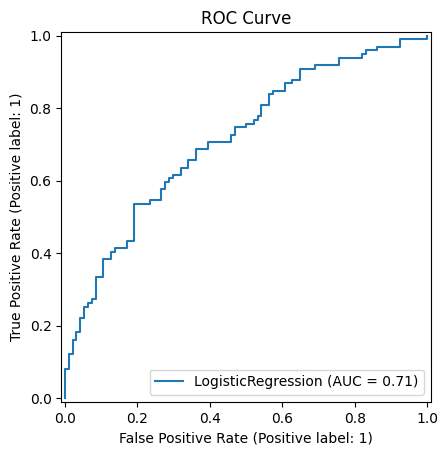

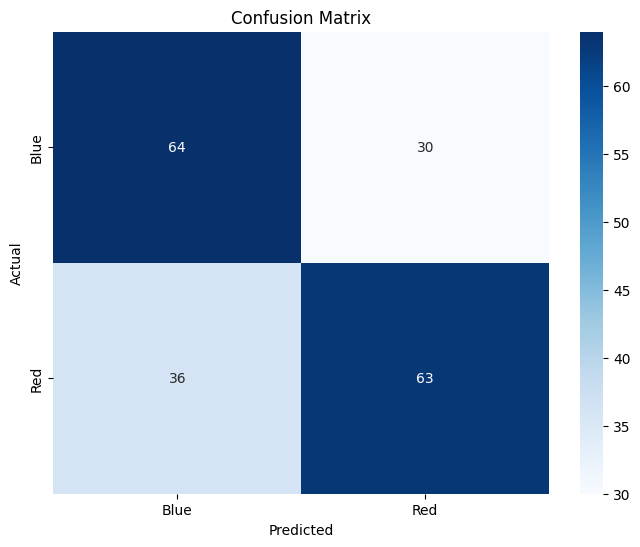

In [ ]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(log_reg_model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Blue", "Red"], yticklabels=["Blue", "Red"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# RESAMPLING

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE

X = df_final_filtered[filtered_features]  # Predefined filtered features
y = df_final_filtered['Winner']  # Target variable

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 1: Use Stratified K-Fold Cross-Validation with GridSearch for Hyperparameter Tuning
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Initialize Gradient Boosting Classifier
gbc_tuned = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    gbc_tuned, param_grid, scoring='roc_auc', cv=skf, n_jobs=-1
)

# Perform Grid Search
grid_search.fit(X_resampled, y_resampled)

# Retrieve the best parameters and model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model using Stratified K-Fold
accuracy_list, precision_list, recall_list, roc_auc_list = [], [], [], []

for train_index, test_index in skf.split(X_resampled, y_resampled):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

    # Train the best model
    best_model.fit(X_train, y_train)

    # Make Predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate Metrics
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    recall_list.append(recall_score(y_test, y_pred))
    roc_auc_list.append(roc_auc_score(y_test, y_pred_prob))

# Calculate and Print Average Metrics
avg_accuracy = sum(accuracy_list) / len(accuracy_list)
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_roc_auc = sum(roc_auc_list) / len(roc_auc_list)

print("\nFinal Results with Tuned Model on Predefined Features:")
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall: {avg_recall:.2f}")
print(f"Average ROC-AUC: {avg_roc_auc:.2f}")


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

Final Results with Tuned Model on Predefined Features:
Average Accuracy: 0.67
Average Precision: 0.66
Average Recall: 0.69
Average ROC-AUC: 0.72


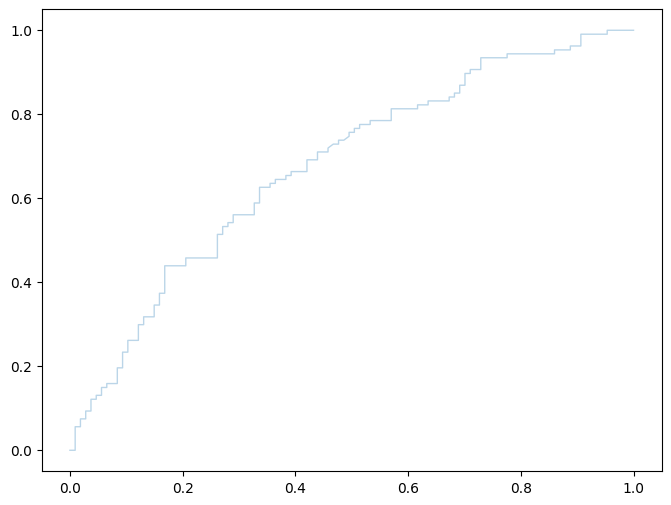

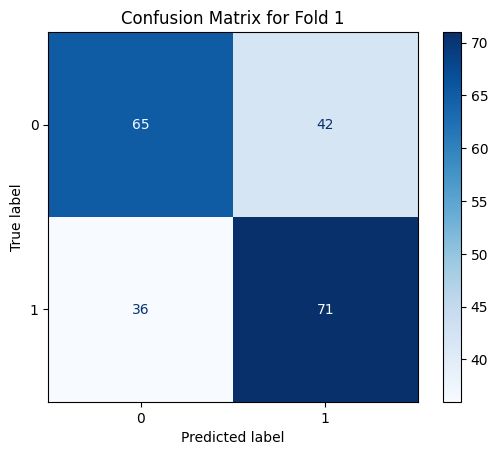

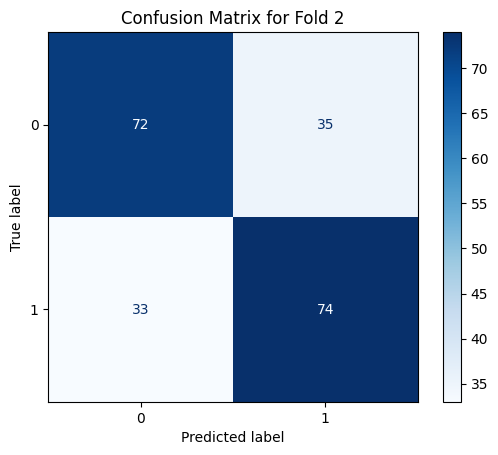

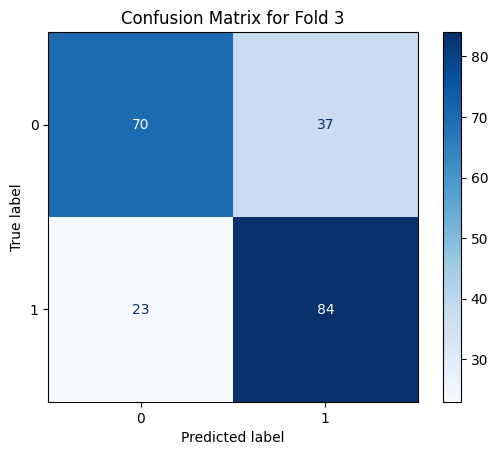

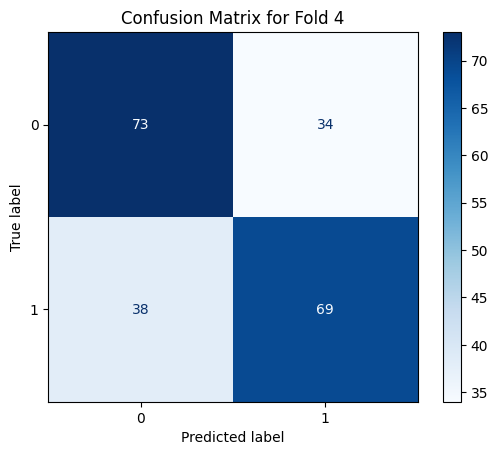

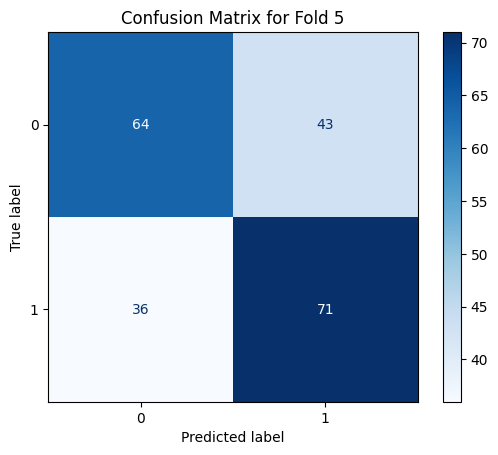

In [ ]:
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay, confusion_matrix

# Initialize lists for ROC-AUC plotting
tprs, mean_fpr = [], np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(8, 6))

for fold_idx, (train_index, test_index) in enumerate(skf.split(X_resampled, y_resampled)):
    X_train, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

    # Train the best model
    best_model.fit(X_train, y_train)

    # Make Predictions
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    # Plot ROC for each fold
    ax.plot(fpr, tpr, lw=1, alpha=0.3, label=f"Fold {fold_idx+1} ROC-AUC: {roc_auc_score(y_test, y_pred_prob):.2f}")

    # Calculate and Display Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for Fold {fold_idx+1}")
    plt.show()

# Plot the mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(roc_auc_list)
std_auc = np.std(roc_auc_list)
ax.plot(mean_fpr, mean_tpr, color='b', label=f"Mean ROC-AUC: {mean_auc:.2f} ± {std_auc:.2f}", lw=2, alpha=0.8)

# Random chance line
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label="Chance")

# Aesthetics
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC-AUC Curve")
ax.legend(loc="lower right")
plt.show()